In [1]:
#==================================================
# Imports
#==================================================
import numpy as np
import matplotlib.pyplot as plt
import glob
import xarray
import datetime
import calendar
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import matplotlib
import os
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import h5py

In [2]:
#--------------------------------------------
# Functions
#--------------------------------------------
def toTimestamp(d):
    return calendar.timegm(d.timetuple())

def toDatetime(d):
    return datetime.datetime.utcfromtimestamp(d)

# Read in RSP files and put variables in a dictionary

In [3]:
# Grab RSP files
base_time = datetime.datetime(2019,9,25)
rsp_path = '/discover/nobackup/mwstanfo/camp2ex_data/rsp/20190925/v2/'
rsp_files = sorted(glob.glob(rsp_path+'*.h5'))
num_rsp_files = len(rsp_files)
print('# of RSP files:',num_rsp_files)

time_arr = []
cth_arr = []
ctt_arr = []
Reff_arr = []
ve_arr = []
tau_arr = []
phase_arr = []
nd_arr = []
lwp_arr = []
cloud_test_arr = []


for tt in range(num_rsp_files):
    
    file_name = rsp_files[tt]
    file_time = file_name.split('/')[-1]
    file_time = file_time.split('.')[0]
    file_time = file_time.split('_')[-2]
    
    infile = h5py.File(file_name,"r")
    keys_list = list(infile.keys())
    data = infile['Data']
    geom = infile['Geometry']
    time_secs = np.array(data['Product_Time_Seconds'])# seconds after midnight
    # Convert to datetimes
    time = np.array([base_time + datetime.timedelta(seconds=time_secs[dd]) for dd in range(len(time_secs))])
    cloud_test_passed = np.squeeze(np.array(data['Cloud_Test_Passed']))
    cloud_top_alt = np.array(data['Cloud_Top_Altitude'])[0,:]
    cloud_top_temp = np.array(data['Cloud_Top_Temperature'])
    cloud_liquid_index = np.array(data['Cloud_Liquid_Index'])[0,:]
    cloud_bow_optical_thickness = np.array(data['Cloud_Bow_Optical_Thickness'])
    cloud_bow_droplet_effective_radius = np.array(data['Cloud_Bow_Droplet_Effective_Radius'])
    cloud_bow_droplet_effective_variance = np.array(data['Cloud_Bow_Droplet_Effective_Variance'])
    cloud_bow_droplet_number_concentration_adiabatic = np.array(data['Cloud_Bow_Droplet_Number_Concentration_Adiabatic'])
    cloud_bow_liquid_water_path = np.array(data['Cloud_Bow_Liquid_Water_Path'])
    
    time_arr.append(time)
    cth_arr.append(cloud_top_alt)
    Reff_arr.append(cloud_bow_droplet_effective_radius)
    ve_arr.append(cloud_bow_droplet_effective_variance)
    tau_arr.append(cloud_bow_optical_thickness)
    phase_arr.append(cloud_liquid_index)
    cloud_test_arr.append(cloud_test_passed)
    nd_arr.append(cloud_bow_droplet_number_concentration_adiabatic)
    lwp_arr.append(cloud_bow_liquid_water_path)
    ctt_arr.append(cloud_top_temp)
    
time_arr = np.array(time_arr,dtype=object)
cth_arr = np.array(cth_arr,dtype=object)
ctt_arr = np.array(ctt_arr,dtype=object)
Reff_arr = np.array(Reff_arr,dtype=object)
ve_arr = np.array(ve_arr,dtype=object)
tau_arr = np.array(tau_arr,dtype=object)
phase_arr = np.array(phase_arr,dtype=object)
cloud_test_arr = np.array(cloud_test_arr,dtype=object)
nd_arr = np.array(nd_arr,dtype=object)
lwp_arr = np.array(lwp_arr,dtype=object)

time_arr = np.concatenate(time_arr,axis=0)
cth_arr = np.concatenate(cth_arr,axis=0)
ctt_arr = np.concatenate(ctt_arr,axis=0)
tau_arr = np.concatenate(tau_arr,axis=0)
Reff_arr = np.concatenate(Reff_arr,axis=0)
ve_arr = np.concatenate(ve_arr,axis=0)
phase_arr = np.concatenate(phase_arr,axis=0)
cloud_test_arr = np.concatenate(cloud_test_arr,axis=0)
nd_arr = np.concatenate(nd_arr,axis=0)
lwp_arr = np.concatenate(lwp_arr,axis=0)



rsp_var_dict = {'time':time_arr,\
            'cth':cth_arr,\
            'ctt':ctt_arr,\
            'Reff':Reff_arr,\
            'v_e':ve_arr,\
            'tau':tau_arr,\
            'nd':nd_arr,\
            'lwp':lwp_arr,\
            'cloud_test':cloud_test_arr}

dumid = np.where((rsp_var_dict['nd'] > -999.) & (rsp_var_dict['cth'] > 0.))#[0]
for key,val in rsp_var_dict.items():
    rsp_var_dict[key] = val[dumid]


# of RSP files: 27


/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1471964751.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  time_secs = np.array(data['Product_Time_Seconds'])# seconds after midnight
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1471964751.py:34: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  cloud_test_passed = np.squeeze(np.array(data['Cloud_Test_Passed']))
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1471964751.py:35: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  cloud_top_alt = np.array(data['Cloud_Top_Altitude'])[0,:]
/gpfsm/dnb33/tdirs/batch/slurm.429319

# Read in APR3 radar files

In [4]:
path = '/discover/nobackup/mwstanfo/camp2ex_data/apr/20190925/'
files = sorted(glob.glob(path+'*Wn.h5'))
num_files = len(files)
print('# of APR3 files:',num_files)

# of APR3 files: 33


# Plot Manuscript Figure (Fig. 2) of time series of APR3 and RSP

/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/460768396.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  time = np.squeeze(np.array(hires_dict['scantime']))
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/460768396.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dist = np.squeeze(np.array(hires_dict['Xat_km']))
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/460768396.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  alt = np.squeeze(np.array(hires_dict['alt3D']))*1.e-3
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/460768396.py:16: Dep

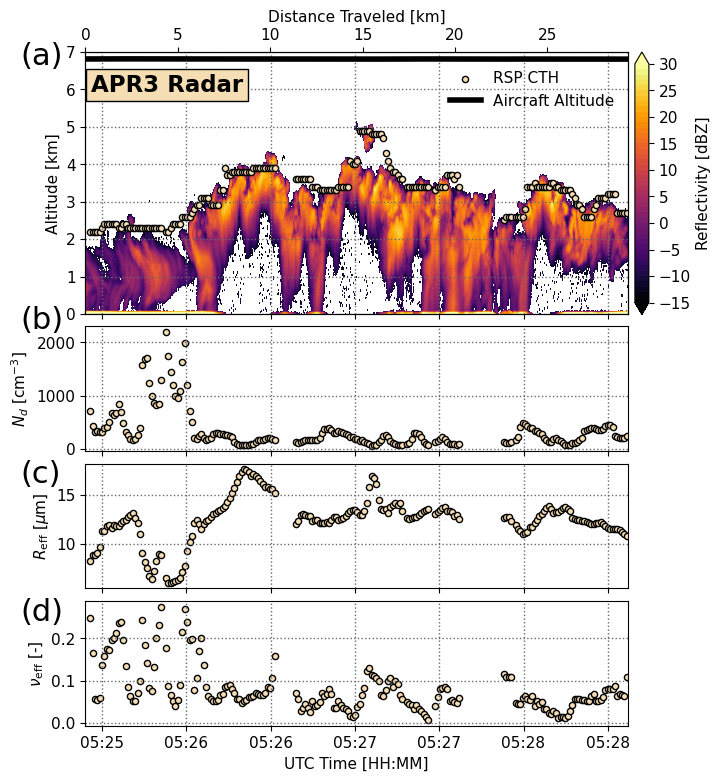

In [6]:
#================================================
# Plot Manuscript Figure
#================================================
infile = h5py.File(files[13],"r")
keys_list = list(infile.keys())
params_w_keys = list(infile['params_W'].keys())
hires_keys = list(infile['hires'].keys())
#data = infile['Data']

hires_dict = infile['hires']

time = np.squeeze(np.array(hires_dict['scantime']))
nt = len(time)
dist = np.squeeze(np.array(hires_dict['Xat_km']))
alt = np.squeeze(np.array(hires_dict['alt3D']))*1.e-3
alt_radar = np.squeeze(np.array(hires_dict['alt_radar']))*1.e-3
alt_nav = np.squeeze(np.array(hires_dict['alt_nav']))*1.e-3
ref = np.squeeze(np.array(hires_dict['z95n']))
time_dt = np.array([toDatetime(time[dd]) for dd in range(nt)])

radar_dict = {'time_dt':time_dt,\
              'alt':alt,\
              'alt_nav':alt_nav,\
              'ref':ref,\
              'dist':dist}


thresh = -15
Fontsize=11
dfmt =mdates.DateFormatter('%H:%M')

ref = radar_dict['ref']
ref[ref < thresh] = np.nan
alt = radar_dict['alt']
alt_nav = radar_dict['alt_nav']
time_dt = radar_dict['time_dt']

dumid = np.squeeze(np.where( (rsp_var_dict['time'] >= time_dt[0]) & (rsp_var_dict['time'] <= time_dt[-1]) ))

# Make 2D time array
time2D = []
for kk in range(alt.shape[0]):
    time2D.append(time_dt)
time2D = np.array(time2D)


#=====================
# Plot Figure
#=====================
fig = plt.figure(figsize=(7,8.75))
gs =  GridSpec(nrows=5,ncols=1,figure=fig,hspace=0.1)
ax1 = fig.add_subplot(gs[0:2,:])
ax2 = fig.add_subplot(gs[2,:])
ax3 = fig.add_subplot(gs[3,:])
ax4 = fig.add_subplot(gs[4,:])

#Reflectivity
ref_levs = np.arange(thresh,31,1)
#ref_levs = np.arange(thresh,35,5)
ref_plot = ax1.contourf(time2D,alt,ref,levels=ref_levs,cmap='inferno',extend='both')
#ref_cbar = fig.colorbar(ref_plot,pad=0.05)
ref_cbar_ax = fig.add_axes([0.91, 0.58, 0.02, 0.3])
ref_cbar = fig.colorbar(ref_plot, cax=ref_cbar_ax)
ref_cbar.ax.set_ylabel('Reflectivity [dBZ]',fontsize=Fontsize)
ref_cbar.ax.tick_params(labelsize=Fontsize)


ax1.set_ylim(0,7)
#ax1.set_xlabel('UTC Time [HH:MM]',fontsize=Fontsize)
ax1.set_ylabel('Altitude [km]',fontsize=Fontsize)
ax1.xaxis.set_major_formatter(dfmt)
ax1.grid(which='both',lw=1,c='dimgrey',ls='dotted')
ax1.tick_params(labelsize=Fontsize)
ax1.set_xlim(time_dt[0],time_dt[-1])

# Plot RSP CTH
if np.size(dumid) > 0.:
    ax1.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['cth'][dumid]*1.e-3,s=20,marker='o',c='wheat',edgecolors='k',label='RSP CTH')


# Plt distance
ax1a = ax1.twiny()
ax1a.set_xlabel('Distance Traveled [km]',fontsize=Fontsize)
ax1a.tick_params(labelsize=Fontsize)
ax1a.plot(dist,alt_nav,lw=2,c='orange',ls='dashed',alpha=0)
ax1a.set_xlim(dist[0],dist[-1])

# Plot Aircraft Altitude
ax1.plot(time_dt,alt_nav,lw=4,c='k',label='Aircraft Altitude')

# Save figure
date_str = time_dt[0].strftime('%Y%m%d')
tmp_date_str = date_str[0:4]+'-'+date_str[4:6]+'-'+date_str[6:8]
start_time_str = time_dt[0].strftime('%H%M')
end_time_str = time_dt[-1].strftime('%H%M')


#-----------------------------
# RSP Nd, Reff, and Veff
#-----------------------------
if np.size(dumid) > 0.:
    axlist = [ax2,ax3,ax4]
    for ax in axlist:
        ax.grid(which='both',lw=1,c='dimgrey',ls='dotted')
        ax.tick_params(labelsize=Fontsize)
        ax.set_xlim(time_dt[0],time_dt[-1])
        ax.xaxis.set_major_formatter(dfmt)

    ax2.set_ylabel('$N_{d}$ [cm$^{-3}$]',fontsize=Fontsize)
    #ax3.set_ylabel('$R_{eff}$ [$\\mu$m]',fontsize=Fontsize)
    #ax3.set_ylabel('$R$ $\\mathregular{_eff}$ [$\\mu$m]',fontsize=Fontsize)
    ax3.set_ylabel('$R\\mathregular{_{eff}}$ [$\\mu$m]',fontsize=Fontsize)
    ax4.set_ylabel('$\\nu\\mathregular{_{eff}}$ [-]',fontsize=Fontsize)

    ax2.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['nd'][dumid],s=20,marker='o',c='wheat',edgecolors='k')
    ax3.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['Reff'][dumid],s=20,marker='o',c='wheat',edgecolors='k')
    ax4.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['v_e'][dumid],s=20,marker='o',c='wheat',edgecolors='k')


ax1.legend(fontsize=Fontsize,loc='upper right',framealpha=False,bbox_to_anchor=(1,0.98))

bbox=dict(facecolor='wheat', edgecolor='black', boxstyle='square,pad=0.2',alpha=1)
ax1.text(0.01,0.85,'APR3 Radar',fontsize=Fontsize*1.5,c='k',bbox=bbox,fontweight='bold',transform=ax1.transAxes,ha='left')
#ax2.text(0.99,0.77,'$N_{d}$',fontsize=Fontsize*1.5,c='k',bbox=bbox,fontweight='bold',transform=ax2.transAxes,ha='right')
#ax3.text(0.99,0.77,'$R_{eff}$',fontsize=Fontsize*1.5,c='k',bbox=bbox,fontweight='bold',transform=ax3.transAxes,ha='right')

ax1.text(-0.12,1.04,'(a)',transform=ax1.transAxes,fontsize=Fontsize*2.,va='top',ha='left')
ax2.text(-0.12,1.17,'(b)',transform=ax2.transAxes,fontsize=Fontsize*2.,va='top',ha='left')
ax3.text(-0.12,1.03,'(c)',transform=ax3.transAxes,fontsize=Fontsize*2.,va='top',ha='left')
ax4.text(-0.12,1.03,'(d)',transform=ax4.transAxes,fontsize=Fontsize*2.,va='top',ha='left')

ax4.set_xlabel('UTC Time [HH:MM]',fontsize=Fontsize)
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

#axlist = [ax1,ax2,ax3]
#for ax in axlist:
#   ax.set_xlim(time_dt[2000],time_dt[-1])

plt.subplots_adjust(hspace=0.05)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_apr_rsp_with_veff.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')

plt.show()
plt.close()

# Version of Fig. 2 without effective variance

/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1102778210.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  time = np.squeeze(np.array(hires_dict['scantime']))
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1102778210.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dist = np.squeeze(np.array(hires_dict['Xat_km']))
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1102778210.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  alt = np.squeeze(np.array(hires_dict['alt3D']))*1.e-3
/gpfsm/dnb33/tdirs/batch/slurm.42931965.mwstanfo/ipykernel_40773/1102778210.py:16:

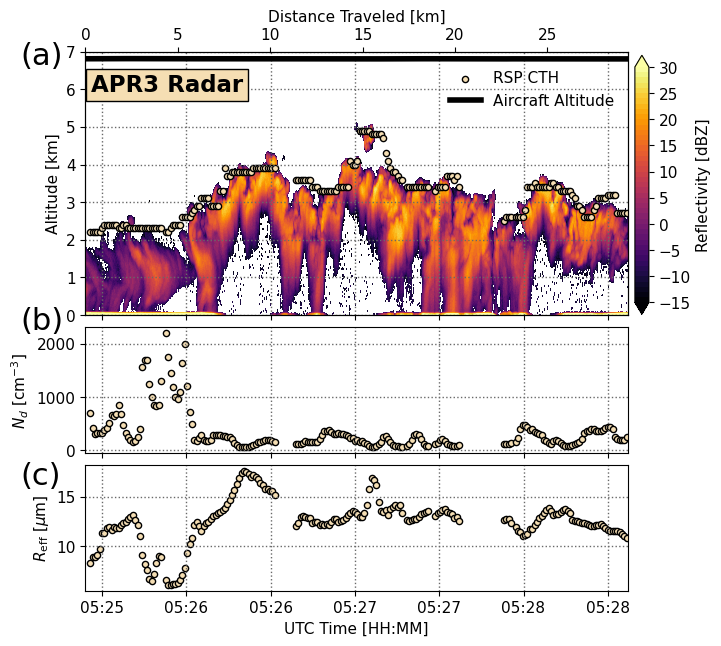

In [7]:
#================================================
# Plot Manuscript Figure
#================================================
infile = h5py.File(files[13],"r")
keys_list = list(infile.keys())
params_w_keys = list(infile['params_W'].keys())
hires_keys = list(infile['hires'].keys())
#data = infile['Data']

hires_dict = infile['hires']

time = np.squeeze(np.array(hires_dict['scantime']))
nt = len(time)
dist = np.squeeze(np.array(hires_dict['Xat_km']))
alt = np.squeeze(np.array(hires_dict['alt3D']))*1.e-3
alt_radar = np.squeeze(np.array(hires_dict['alt_radar']))*1.e-3
alt_nav = np.squeeze(np.array(hires_dict['alt_nav']))*1.e-3
ref = np.squeeze(np.array(hires_dict['z95n']))
time_dt = np.array([toDatetime(time[dd]) for dd in range(nt)])

radar_dict = {'time_dt':time_dt,\
              'alt':alt,\
              'alt_nav':alt_nav,\
              'ref':ref,\
              'dist':dist}


thresh = -15
Fontsize=11
dfmt =mdates.DateFormatter('%H:%M')

ref = radar_dict['ref']
ref[ref < thresh] = np.nan
alt = radar_dict['alt']
alt_nav = radar_dict['alt_nav']
time_dt = radar_dict['time_dt']

dumid = np.squeeze(np.where( (rsp_var_dict['time'] >= time_dt[0]) & (rsp_var_dict['time'] <= time_dt[-1]) ))

# Make 2D time array
time2D = []
for kk in range(alt.shape[0]):
    time2D.append(time_dt)
time2D = np.array(time2D)


#=====================
# Plot Figure
#=====================
fig = plt.figure(figsize=(7,7))
gs =  GridSpec(nrows=4,ncols=1,figure=fig,hspace=0.1)
ax1 = fig.add_subplot(gs[0:2,:])
ax2 = fig.add_subplot(gs[2,:])
ax3 = fig.add_subplot(gs[3,:])

#Reflectivity
ref_levs = np.arange(thresh,31,1)
ref_plot = ax1.contourf(time2D,alt,ref,levels=ref_levs,cmap='inferno',extend='both')
#ref_cbar = fig.colorbar(ref_plot,pad=0.05)
ref_cbar_ax = fig.add_axes([0.91, 0.505, 0.02, 0.37])
ref_cbar = fig.colorbar(ref_plot, cax=ref_cbar_ax)
ref_cbar.ax.set_ylabel('Reflectivity [dBZ]',fontsize=Fontsize)
ref_cbar.ax.tick_params(labelsize=Fontsize)


ax1.set_ylim(0,7)
#ax1.set_xlabel('UTC Time [HH:MM]',fontsize=Fontsize)
ax1.set_ylabel('Altitude [km]',fontsize=Fontsize)
ax1.xaxis.set_major_formatter(dfmt)
ax1.grid(which='both',lw=1,c='dimgrey',ls='dotted')
ax1.tick_params(labelsize=Fontsize)
ax1.set_xlim(time_dt[0],time_dt[-1])

# Plot RSP CTH
if np.size(dumid) > 0.:
    ax1.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['cth'][dumid]*1.e-3,s=20,marker='o',c='wheat',edgecolors='k',label='RSP CTH')


# Plt distance
ax1a = ax1.twiny()
ax1a.set_xlabel('Distance Traveled [km]',fontsize=Fontsize)
ax1a.tick_params(labelsize=Fontsize)
ax1a.plot(dist,alt_nav,lw=2,c='orange',ls='dashed',alpha=0)
ax1a.set_xlim(dist[0],dist[-1])

# Plot Aircraft Altitude
ax1.plot(time_dt,alt_nav,lw=4,c='k',label='Aircraft Altitude')

# Save figure
date_str = time_dt[0].strftime('%Y%m%d')
tmp_date_str = date_str[0:4]+'-'+date_str[4:6]+'-'+date_str[6:8]
start_time_str = time_dt[0].strftime('%H%M')
end_time_str = time_dt[-1].strftime('%H%M')


#-----------------------------
# RSP Nd and Reff
#-----------------------------
if np.size(dumid) > 0.:
    axlist = [ax2,ax3]
    for ax in axlist:
        ax.grid(which='both',lw=1,c='dimgrey',ls='dotted')
        ax.tick_params(labelsize=Fontsize)
        ax.set_xlim(time_dt[0],time_dt[-1])
        ax.xaxis.set_major_formatter(dfmt)

    ax2.set_ylabel('$N_{d}$ [cm$^{-3}$]',fontsize=Fontsize)
    #ax3.set_ylabel('$R_{eff}$ [$\\mu$m]',fontsize=Fontsize)
    #ax3.set_ylabel('$R$ $\\mathregular{_eff}$ [$\\mu$m]',fontsize=Fontsize)
    ax3.set_ylabel('$R\\mathregular{_{eff}}$ [$\\mu$m]',fontsize=Fontsize)

    ax2.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['nd'][dumid],s=20,marker='o',c='wheat',edgecolors='k')
    ax3.scatter(rsp_var_dict['time'][dumid],rsp_var_dict['Reff'][dumid],s=20,marker='o',c='wheat',edgecolors='k')


ax1.legend(fontsize=Fontsize,loc='upper right',framealpha=False,bbox_to_anchor=(1,0.98))

bbox=dict(facecolor='wheat', edgecolor='black', boxstyle='square,pad=0.2',alpha=1)
ax1.text(0.01,0.85,'APR3 Radar',fontsize=Fontsize*1.5,c='k',bbox=bbox,fontweight='bold',transform=ax1.transAxes,ha='left')
#ax2.text(0.99,0.77,'$N_{d}$',fontsize=Fontsize*1.5,c='k',bbox=bbox,fontweight='bold',transform=ax2.transAxes,ha='right')
#ax3.text(0.99,0.77,'$R_{eff}$',fontsize=Fontsize*1.5,c='k',bbox=bbox,fontweight='bold',transform=ax3.transAxes,ha='right')

ax1.text(-0.12,1.04,'(a)',transform=ax1.transAxes,fontsize=Fontsize*2.,va='top',ha='left')
ax2.text(-0.12,1.17,'(b)',transform=ax2.transAxes,fontsize=Fontsize*2.,va='top',ha='left')
ax3.text(-0.12,1.03,'(c)',transform=ax3.transAxes,fontsize=Fontsize*2.,va='top',ha='left')

ax3.set_xlabel('UTC Time [HH:MM]',fontsize=Fontsize)
ax1.set_xticklabels([])
ax2.set_xticklabels([])

#axlist = [ax1,ax2,ax3]
#for ax in axlist:
#   ax.set_xlim(time_dt[2000],time_dt[-1])

plt.subplots_adjust(hspace=0.05)

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_apr_rsp.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')

plt.show()
plt.close()

## Not relevant to manuscript at all, but calculate "k" parameter and make scatterplots of Nd and Veff and of Nd and 'k'

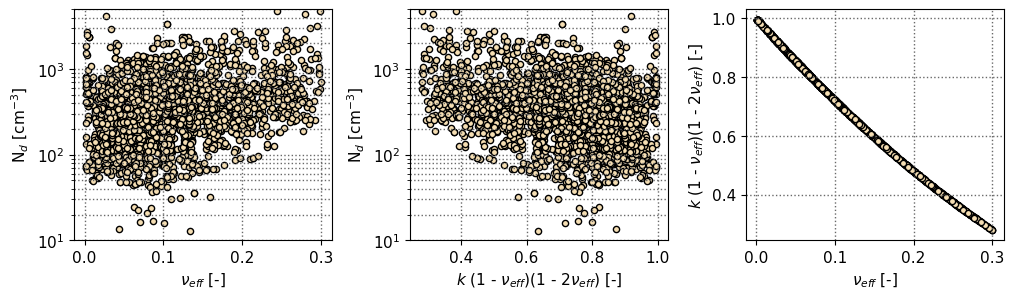

In [8]:
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
Fontsize=11
axlist = [ax1,ax2,ax3]
for ax in axlist:
    ax.grid(which='both',lw=1,c='dimgrey',ls='dotted')
    ax.tick_params(labelsize=Fontsize)
ax1.set_ylabel('N$_{d}$ [cm$^{-3}$]',fontsize=Fontsize)
ax2.set_ylabel('N$_{d}$ [cm$^{-3}$]',fontsize=Fontsize)
    
ax1.set_xlabel('$\\nu_{eff}$ [-]',fontsize=Fontsize)
ax2.set_xlabel('$k$ (1 - $\\nu_{eff}$)(1 - 2$\\nu_{eff}$) [-]',fontsize=Fontsize)
    
ax1.scatter(rsp_var_dict['v_e'],rsp_var_dict['nd'],s=20,marker='o',c='wheat',edgecolors='k')
ax1.set_ylim(10,5000.)
ax1.set_yscale('log')

dum_v_e = rsp_var_dict['v_e'].copy()
dum_k = (1-dum_v_e)*(1-(2.*dum_v_e))
ax2.scatter(dum_k,rsp_var_dict['nd'],s=20,marker='o',c='wheat',edgecolors='k')
ax2.set_ylim(10,5000.)
ax2.set_yscale('log')


ax3.set_xlabel('$\\nu_{eff}$ [-]',fontsize=Fontsize)
ax3.set_ylabel('$k$ (1 - $\\nu_{eff}$)(1 - 2$\\nu_{eff}$) [-]',fontsize=Fontsize)
ax3.scatter(dum_v_e,dum_k,s=20,marker='o',c='wheat',edgecolors='k')

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close()